<a href="https://colab.research.google.com/github/edynsoncoronado/ReadTheFuckingManual/blob/master/BigO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
def sum1(n):
  final_sum = 0
  for x in range(n+1):
    final_sum += x
  return final_sum

In [4]:
sum1(5)

15

In [5]:
def sum2(n):
  return (n*(n+1)/2)


In [6]:
sum2(5)

15.0

In [7]:
# built in magic commands in notebook
# result is microseconds
%timeit sum1(100)

100000 loops, best of 3: 4.17 µs per loop


In [8]:
%timeit sum2(100)     
# order is nanoseconds per loop

The slowest run took 20.60 times longer than the fastest. This could mean that an intermediate result is being cached.
10000000 loops, best of 3: 120 ns per loop


  - MICRO=10^6
  - NANO=10^9

  Smaller number is obviously faster
  -cannot simply rely on time to run because all computers are different and some faster than others.
  - to be hardware independent != Big O



Big-O notation describes how quickly runtime will grow relative to the input as the input get arbitrarily large.

Remember, we want to compare how quickly runtime will grow, not compare exact runtimes, since those can vary depending on hardware.

Big-O analysis is also known as **asymtotic analysis**.

In math, asymptotic analysis = **describing limiting behavior**

<table>
<tr>
  <td>
    <b>BigO</b>
  </td>
  <td>
    <b>Name</b>
  </td>
</tr>
<tr>
  <td>
    1
  </td>
  <td>
    Constant
  </td>
</tr>
<tr>
  <td>
    log(n)
  </td>
  <td>
    Logarithmic
  </td>
</tr>
<tr>
  <td>
    n
  </td>
  <td>
    Linear
  </td>
</tr>
<tr>
  <td>
    nlog(n)
  </td>
  <td>
    Log Linear
  </td>
</tr>
<tr>
  <td>
    n^2
  </td>
  <td>
    Quadratic
  </td>
</tr>
<tr>
  <td>
    n^3
  </td>
  <td>
    Cubic
  </td>
</tr>
<tr>
  <td>
    2^n
  </td>
  <td>
    Expoential
  </td>
</tr>
</table>

Text(0.5, 0, 'n')

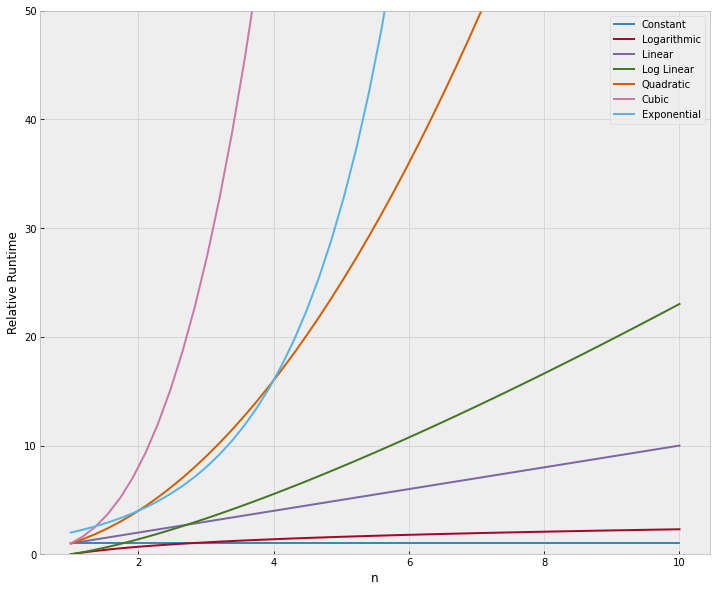

In [10]:
from math import log
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

# Set up runtime comparisons
n = np.linspace(1, 10)
labels = ['Constant', 'Logarithmic', 'Linear', 'Log Linear', 'Quadratic', 'Cubic', 'Exponential']
big_o = [np.ones(n.shape), np.log(n), n, n*np.log(n), n**2, n**3, 2**n]

# Plot setup
plt.figure(figsize=(12, 10))
plt.ylim(0,50)

for i in range(len(big_o)):
  plt.plot(n, big_o[i], label=labels[i])

plt.legend(loc=0)
plt.ylabel('Relative Runtime')
plt.xlabel('n')

<h2><b>Big O Examples</b></h2>

**O(1) Constant**  
It does not matter how large my values list becomes, the function will only grab the indexed position 0 in that list.

**O(n) Linear**  
Every value will print for the list, each time, so the larger the list gets the larger the BigO.

In [12]:
def func_lin(lst):
  for val in lst:
    print(val)

func_lin([1, 2, 3])

1
2
3


**O(n^2) Quatratic**  
- two loops, one nested inside another.
- for a list of n items, we will have to perfom n operations for every item in the list! THis means in total, we will perform n items n assignments, or n^2. So a list of 10 items will have 10^2, or 100 operations. You can see how dnagerous this can get for very large inputs! THis is why Big-O is so important to be aware of!
- hence, the input of 3 gives us 9 outputs iterations.

In [14]:
def func_quad(lst):
  for item_1 in lst:
    for item_2 in lst:
      print(item_1, item_2)

lst = [1, 2, 3]
func_quad(lst)

1 1
1 2
1 3
2 1
2 2
2 3
3 1
3 2
3 3


**Calculating Scale of Big-O**  
Insignificant terms drop out of Big-O notation.


In [15]:
def print_once(lst):
  for val in lst:
    print(val)
print_once(lst)
# can you see how this growth is linear to the input?
# O(n)

1
2
3


In [16]:
def print_3(lst):
  for val in lst:
    print(val)
  
  for val in lst:
    print(val)
  
  for val in lst:
    print(val)
print_3(lst)

1
2
3
1
2
3
1
2
3


This algo will run 3 times for each n, so this becomes an order of 3(n). It is still linear.  
More importantly, 3(infinity) is not really different than (infinity) and we can drop insignificant constants.

So this too is O(n)

In [17]:
def comp(lst):
  '''
  This function prints the first item O(1) it is a constant.
  The is print the first 1/2 of the list O(n/2).
  The print a string 10 times O(10) it is a constant.
  '''
  print(lst[0])

  midpoint = len(lst)//2

  for val in lst[:midpoint]:
    print(val)
  
  for x in range(10):
    print('number')

In [18]:
lst = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
comp(lst)

1
1
2
3
4
5
number
number
number
number
number
number
number
number
number
number


**O(1 + n/2 + 10)**  
An n gets larger and larger (scales up) you can  easily see how the 1 and the 10 quickly begin to mean nothing.

And the //2 will begin to have no effect either.

End up with O(n)

**Worst Case vs BEst Case**  
Many times we are only concerned with the worst possible case of an algorithm, but in an interview setting its important to keep in mind that wors case and best case scenarios may be completely different Big-O times.

In [19]:
def matcher(lst, match):
  for item in lst:
    if item == match:
      return True
  return False

In [20]:
lst

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [ ]:
# this is best case because item seeked is index 0. O(1) Best case becomes a constant.
matcher(lst, 1)

In [21]:
# worst case, entire list must be searched, n elements. O(n) Worst becomes linear.
matcher(lst, 20)

False

**Space Complexity**  
Also concerned with how much memory/space an algorithm uses. THe notation of space complexity is the same, but instead of checking the time of operations, we check the size of the allocation of memory.

In [22]:
def memory(n=10):
  for x in range(n):  # TIME COMPLEXITY O(n)
    print('Memory!')  # SPACE COMPLEXITY O(1)

memory(10)

Memory!
Memory!
Memory!
Memory!
Memory!
Memory!
Memory!
Memory!
Memory!
Memory!


O(n) for time complexity but what about space complexity.  
In memory it does not need to store 10 version of "Memory!" It only need store one string. O(1)